In [203]:
G = 6.67384e-8 # cm^3/g/s^2
c = 2.99792458e10 # speed of light  / cm/s
kB = 1.3806488e-16 # Boltzmann const / erg/K
mH = 1.66053892e-24 # atomic mass unit / g
me = 9.1093898e-28 # electron mass / g
alphaEM = 1/137.0359895 # fine structure constant
sigmaT = 8*np.pi/3*(alphaEM*hbar/me/c)**2 # Thomson cross section / cm^2
a_rad =  np.pi**2/15*kB*(kB/hbar/c)**3 # radiation const / erg/cm^3/K^4
stefan = a_rad*c/4 # Stefan-Boltzmann const / erg/cm^2/s/K^4
eV = 1.60217733e-12 # 1 electron volt / erg
keV = 1e3*eV
Msun = 1.98892e33 # solar mass / g

kappa_es = 0.4 # opacity by electron scattering / cm^2/g
kappa_0 = 6.45e22 # krammers opacity at (rho,T)=(1,1) in cgs
nu_0 = 2.4e21*15 # electron-ion coupling (Coulomb log = 15)

In [204]:
import numpy as np
import matplotlib.pyplot as plt

In [220]:
def schwarz(M):
    '''
    give M in Msuns
    out in cms
    '''
    return 2*G*(M*Msun)/(c**2)

def m_edd(M):
    '''
    give M in MSuns
    out in g/s
    '''
    epsilon = 0.1
    return (4*np.pi*G*(M*Msun)*mH)/(epsilon*c*sigmaT)


def omega(M,r):
    '''
    M in Msun
    r in rschwarz
    '''
    return (G*M*Msun/((r*schwarz(M))**3))**0.5


def domega_dr(M,r):
    '''
    M in Msun
    r in rschwarz
    '''
    return (1.5)*(G*M*Msun/((r*schwarz(M))**5))**0.5


def d2omega_d2r(M,r):
    '''
    M in Msun
    r in rschwarz
    '''
    return (15/4)*(G*M*Msun/((r*schwarz(M))**3))**0.5

def sigma_ana(Mdot,r,r_star,nu):
    '''
    Mdot in msun/second
    r in schwarz
    r_star in schwarz
    '''
    
    return (Mdot*Msun/(3*np.pi*nu))*(1-(r_star/r)**0.5)




In [206]:
def dsigma_dr(r,sigma,M,Mdot,nu):
    
    num = 2*(r*schwarz(M))*(Mdot*Msun) + domega_dr(M,r) - 2*np.pi*nu*(r*schwarz(M))**3*sigma*d2omega_d2r(M,r) - 4*np.pi*sigma*nu*domega_dr(M,r)*(r*schwarz(M))**2
    
    den = 2*np.pi*nu*domega_dr(M,r)*(r*schwarz(M))**3
    
    return np.divide(num,den)


# RK-4 Solution

In my original notebook, both the numerical as well as the analytical solution had the same shape, but since I have rewritten it (the old one got deleted as I messaged Prof. Wise on teams), the numerical one is flipped for some reason. I am still trying to figure this out. I suspect it must have something to do with units/ not keeping track of the units

In [ ]:
M = 10
Mdot = m_edd(10)/Msun
nu = 0.5
r_star = 3

In [199]:
N = 100
r0 = 3
r_end = 10
h = (r_end-r0)/N
r = np.arange(a,b,h)
sigmas = np.zeros(N)
s0 = 0
sigmas[0] = 0
#r = r0
for i in range (1,N):
    s = sigmas[i]
    k1 = h * dsigma_dr(r[i],s,M,Mdot,nu)
    k2 = h * dsigma_dr(r[i] + 0.5 * h, s + 0.5 * k1,M,Mdot,nu)
    k3 = h * dsigma_dr(r[i] + 0.5 * h, s + 0.5 * k2,M,Mdot,nu)
    k4 = h * dsigma_dr(r[i] + h, s + k3,M,Mdot,nu)
    
    sigmas[i] = s + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

In [162]:
Mdot*Msun

1.3888323831092627e+19

In [198]:
k2

-27368502143775.664

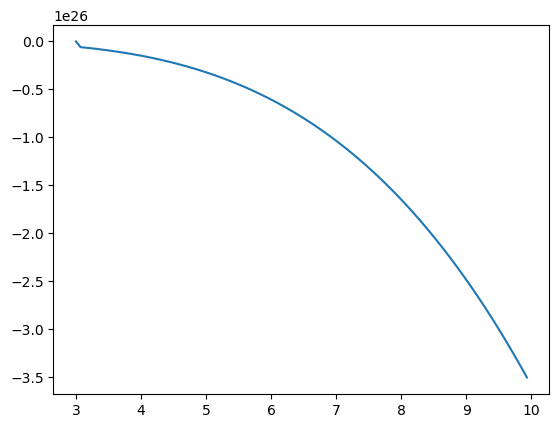

In [202]:
plt.plot(r,sigmas)
#plt.plot(r,sigmas)

In [95]:
dsigma_dr(r[2],sigmas[2],M,Mdot,nu)

/tmp/ipykernel_12209/524352976.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return (-3/2)*(G*M*Msun/((r*schwarz(M))**5))**0.5
/tmp/ipykernel_12209/524352976.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  return (15/4)*(G*M*Msun/((r*schwarz(M))**3))**0.5
/tmp/ipykernel_12209/1777392283.py:3: RuntimeWarning: invalid value encountered in double_scalars
  num = 2*(r*schwarz(M))*(Mdot*Msun) + domega_dr(M,r) - 2*np.pi*nu*(r*schwarz(M))**3*sigma*d2omega_d2r(M,r) - 4*np.pi*sigma*nu*domega_dr(M,r)*(r*schwarz(M))**2
/tmp/ipykernel_12209/1777392283.py:5: RuntimeWarning: invalid value encountered in double_scalars
  den = 2*np.pi*nu*domega_dr(M,r)*(r*schwarz(M))**3


(nan, nan)

In [96]:
r

array([3.  , 3.07, 3.14, 3.21, 3.28, 3.35, 3.42, 3.49, 3.56, 3.63, 3.7 ,
       3.77, 3.84, 3.91, 3.98, 4.05, 4.12, 4.19, 4.26, 4.33, 4.4 , 4.47,
       4.54, 4.61, 4.68, 4.75, 4.82, 4.89, 4.96, 5.03, 5.1 , 5.17, 5.24,
       5.31, 5.38, 5.45, 5.52, 5.59, 5.66, 5.73, 5.8 , 5.87, 5.94, 6.01,
       6.08, 6.15, 6.22, 6.29, 6.36, 6.43, 6.5 , 6.57, 6.64, 6.71, 6.78,
       6.85, 6.92, 6.99, 7.06, 7.13, 7.2 , 7.27, 7.34, 7.41, 7.48, 7.55,
       7.62, 7.69, 7.76, 7.83, 7.9 , 7.97, 8.04, 8.11, 8.18, 8.25, 8.32,
       8.39, 8.46, 8.53, 8.6 , 8.67, 8.74, 8.81, 8.88, 8.95, 9.02, 9.09,
       9.16, 9.23, 9.3 , 9.37, 9.44, 9.51, 9.58, 9.65, 9.72, 9.79, 9.86,
       9.93])

# Analytical

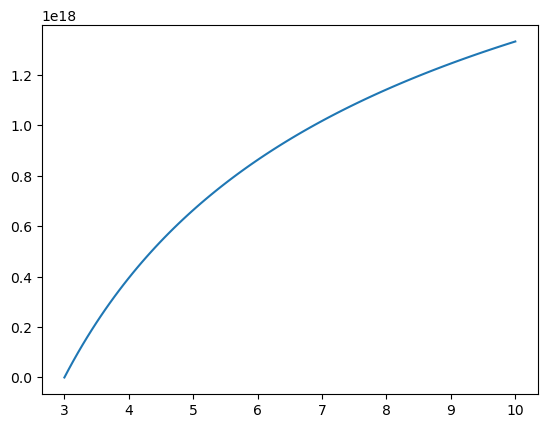

In [86]:
M = 10
r = np.linspace(3,10,100)
Mdot = m_edd(10)/Msun
nu = 0.5
r_star = 3

density = sigma_ana(Mdot,r,r_star,nu)
plt.plot(r,density)

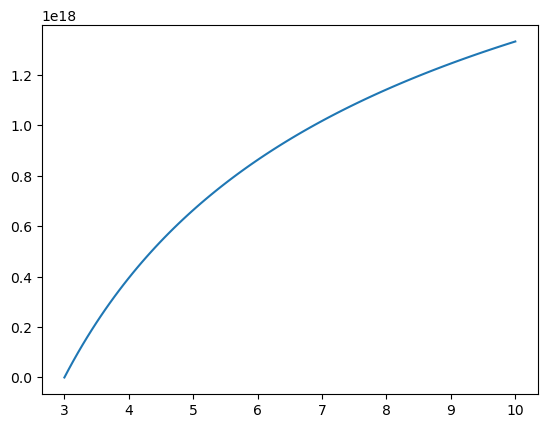

In [57]:
schwarz(10)

2953804.1430717465

In [251]:
class SS:
    def __init__(self, M, M_dot, alpha, r_out, r_in=3):
        """
        M = mass of black hole / solar mass
        M_dot = mass accretion rate 
        alpha = viscosity parameter (0<alpha<=1)
        r_out = radius of disk's outer edge 
        r_in = radius of disk's inner edge 

        """
        rg = 2*G*M*Msun/2.99792458e10**2
        self.M = M*Msun
        self.M_dot = M_dot*M*MEsun
        self.alpha = alpha
        self.r_in = r_in*rg
        self.r_out = r_out*rg
        self.r = np.geomspace(self.r_in, self.r_out, N+1)[1:]
        self.y = StandardModel.solve(self, self.r)
